In [2]:
!pip install sklearn

  Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [5]:
!pip install mlxtend

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, preprocessing, cross_validation
from mlxtend.plotting import plot_decision_regions

In [10]:
df_wine_all = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine = df_wine_all[[0, 10, 13]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)

,class,color,proline
0,1,5.640000,1065
1,1,4.380000,1050
2,1,5.680000,1185
3,1,7.800000,1480
4,1,4.320000,735
5,1,6.750000,1450
6,1,5.250000,1290
7,1,5.050000,1295
8,1,5.200000,1045
9,1,7.220000,1045


In [11]:
%matplotlib inline

<function matplotlib.pyplot.show>

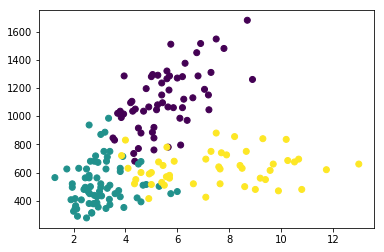

In [12]:
x = df_wine["color"]
y = df_wine["proline"]
z = df_wine["class"] - 1
plt.scatter(x, y, c = z)
plt.show

In [13]:
X = df_wine[["color", "proline"]]
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [14]:
clf_result = linear_model.SGDClassifier(loss="hinge")

In [15]:
scores = cross_validation.cross_val_score(clf_result, X_std, z, cv = 10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.894265995872
正解率の標準偏差 =  0.0821921920973


c:\users\tanla\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\tanla\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

正答率 =  0.888888888889


c:\users\tanla\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


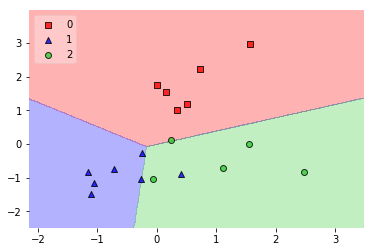

In [16]:
X_train, X_test, train_label, test_label = cross_validation.train_test_split(X_std, z, test_size = 0.1, random_state = 0)
clf_result.fit(X_train, train_label)
pre = clf_result.predict(X_test)
ac_score = metrics.accuracy_score(test_label, pre)
print("正答率 = ", ac_score)
X_train_plot = np.vstack(X_train)
train_label_plot = np.hstack(train_label)
X_test_plot = np.vstack(X_test)
test_label_plot = np.hstack(test_label)
plot_decision_regions(X_test_plot, test_label_plot, clf = clf_result, res = 0.01, legend = 2)

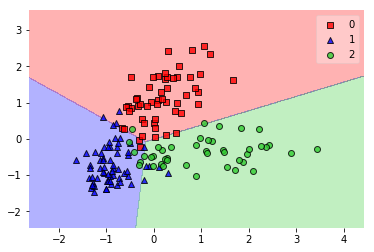

In [17]:
plot_decision_regions(X_train_plot, train_label_plot, clf = clf_result, res = 0.01)

In [21]:
# predicted_label = clf_result.predict([1, -1])
# print("this label = ", predicted_label)

In [22]:
print(clf_result.intercept_)
print(clf_result.coef_)

[ -3.5070144  -10.0810886   -4.05761486]
[[  4.20787921  21.29486363]
 [-18.71162161 -10.5165603 ]
 [ 18.05781307 -13.77174057]]
